<a href="https://colab.research.google.com/github/Mohamed-Abdelnaby-Oraby/2020---Journal-of-Geochemical-Exploration--Manifold/blob/master/scott_halley_geochem_k-mean%20clustering%20and%20heirarchal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scott Halley's Data Muckaround

A notebook for some mucking around with Scott Halley's multielement Andean geochemical data sets.

In [ ]:
# import libraries
import warnings
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from astropy.visualization  import simple_norm
%matplotlib inline

# hide warnings
warnings.filterwarnings('ignore')

# set path to data file
fn = r'/mnt/c/Users/thoma/Downloads/Porphyry Cu Geochemistry Module1.csv'

# read this into a data frame
df = pd.read_csv(fn)
df

,Sample,East,North,Elevation,holeid,from,to,Ag_ppm,Al_pct,As_ppm,...,Th_ppm,Ti_pct,Tl_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm,SiO2
0,1,12653.60489,5949.422692,1872.164223,DDH001,143.43,144.43,1.23,8.21,8.9,...,3.10,0.578,0.81,1.1,208,11.8,22.0,51.0,0.8,53.27
1,2,12654.25374,5949.308283,1871.379028,DDH001,144.43,145.48,1.38,7.97,3.8,...,3.49,0.532,0.86,1.1,192,20.3,22.4,37.0,0.8,50.92
2,3,12654.90258,5949.193873,1870.593832,DDH001,145.48,146.48,1.00,8.18,5.3,...,3.57,0.527,0.81,1.5,190,39.6,22.9,36.0,1.0,48.64
3,4,12655.53561,5949.082255,1869.827788,DDH001,146.48,147.48,1.50,7.22,12.6,...,2.69,0.467,0.74,1.6,164,78.0,22.6,35.0,1.2,51.53
4,5,12656.18445,5948.967845,1869.042592,DDH001,147.48,148.53,1.36,7.21,7.0,...,1.88,0.459,0.84,0.7,185,42.4,20.0,32.0,1.5,56.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,3826,12664.15058,5724.908110,1239.594075,DDH014,794.00,796.00,0.45,7.41,68.5,...,4.13,0.121,0.72,1.2,44,25.6,4.3,11.0,0.5,67.79
3826,3827,12664.74653,5724.665842,1237.700361,DDH014,796.00,798.00,0.43,7.60,49.4,...,4.13,0.128,0.55,1.8,43,10.8,4.8,10.0,0.6,67.96
3827,3828,12665.34226,5724.423193,1235.806630,DDH014,798.00,800.00,0.29,7.57,68.2,...,4.23,0.145,0.54,1.1,43,12.9,4.7,11.0,0.8,68.68
3828,3829,12665.93782,5724.180209,1233.912884,DDH014,800.00,802.00,0.33,7.67,133.5,...,3.92,0.155,0.51,1.2,49,17.2,4.6,14.0,1.0,68.68


## Data Munging

Do some data tidying up by converting SiO2 weight percent to Si ppm and convert all other weight percent analyses to ppm.

In [ ]:
# # convert SiO2 weight percent to Si ppm
df['Si_ppm'] = df.SiO2 * (28.0855 / (28.0855 + (15.9994 * 2))) * 10000
df.drop(columns=['SiO2'], axis=1, inplace=True)

# convert weight percent columns to ppm
for col in df.columns:
  if '_pct' in col:
    df[col.replace('_pct', '_ppm')] = df[col] * 10000
    df.drop(columns=[col], axis=1, inplace=True)

df.head()

,Sample,East,North,Elevation,holeid,from,to,Ag_ppm,As_ppm,Ba_ppm,...,Zr_ppm,Si_ppm,Al_ppm,Ca_ppm,Fe_ppm,K_ppm,Mg_ppm,Na_ppm,S_ppm,Ti_ppm
0,1,12653.60489,5949.422692,1872.164223,DDH001,143.43,144.43,1.23,8.9,170,...,0.8,249002.582205,82100.0,44300.0,63800.0,21200.0,20500.0,23800.0,26100.0,5780.0
1,2,12654.25374,5949.308283,1871.379028,DDH001,144.43,145.48,1.38,3.8,210,...,0.8,238017.861571,79700.0,48500.0,56800.0,22900.0,19600.0,23400.0,37000.0,5320.0
2,3,12654.90258,5949.193873,1870.593832,DDH001,145.48,146.48,1.00,5.3,220,...,1.0,227360.345381,81800.0,47200.0,63900.0,23800.0,19400.0,20300.0,42100.0,5270.0
3,4,12655.53561,5949.082255,1869.827788,DDH001,146.48,147.48,1.50,12.6,290,...,1.2,240869.214587,72200.0,44000.0,78900.0,20300.0,14500.0,21900.0,39700.0,4670.0
4,5,12656.18445,5948.967845,1869.042592,DDH001,147.48,148.53,1.36,7.0,170,...,1.5,262464.707919,72100.0,44000.0,56900.0,17400.0,18400.0,20800.0,30200.0,4590.0


### Detection Limits

If there are any elements with analyses less than zero, indicating a below detection limit analysis, set this to positive 1/2 the detection limit.

In [ ]:
# get a list of column names with 'ppm' in them, sort it alphabetically
ppm_cols = sorted([x for x in df.columns if 'ppm' in x])

# loop through each column, find the minimum value and if it is less than zero
# set it to positive half
for col in ppm_cols:
  if df[col].dropna().min() < 0:
    df.loc[df[col] < 0, col] = abs(df[col].dropna().min()) / 2
    print (col, 'has BDL analyses now set to half DL of', abs(df[col].dropna().min()) / 2, 'ppm')

As_ppm has BDL analyses now set to half DL of 0.05 ppm
Cd_ppm has BDL analyses now set to half DL of 0.005 ppm
Ge_ppm has BDL analyses now set to half DL of 0.0125 ppm
Hf_ppm has BDL analyses now set to half DL of 0.025 ppm
Re_ppm has BDL analyses now set to half DL of 0.0005 ppm
Sb_ppm has BDL analyses now set to half DL of 0.0125 ppm
Se_ppm has BDL analyses now set to half DL of 0.25 ppm
Ta_ppm has BDL analyses now set to half DL of 0.0125 ppm
Te_ppm has BDL analyses now set to half DL of 0.0125 ppm
Zn_ppm has BDL analyses now set to half DL of 0.5 ppm


### Nullity

Use the missingno library to inspect missing data with a nullity barplot.

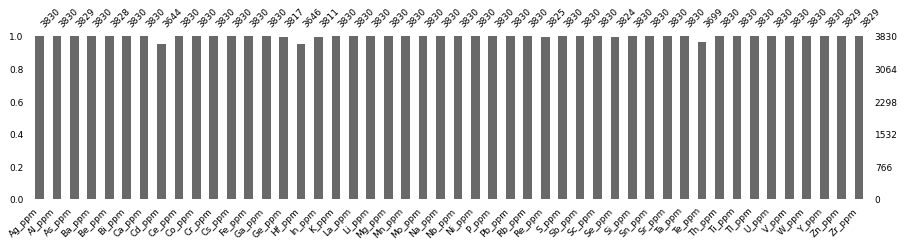

In [ ]:
# plot a missing data barplot for ppm columns
msno.bar(df[ppm_cols], figsize=(15,3), fontsize=9)
plt.show()

Looks like a handful of elements have missing data. Lets just drop these rows altogether.

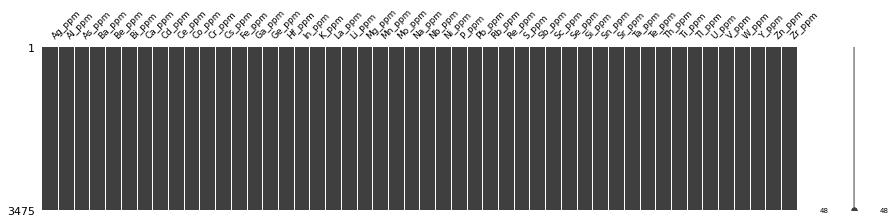

In [ ]:
# drop rows with nulls in any ppm column, reset the index
df.dropna(subset=ppm_cols, inplace=True)
df.reset_index(inplace=True, drop=True)

# plot a missing data matrix
msno.matrix(df[ppm_cols], figsize=(15,3), fontsize=9)
plt.show()

### Data Precision

Use quantile-quantile plots to inspect data precision.

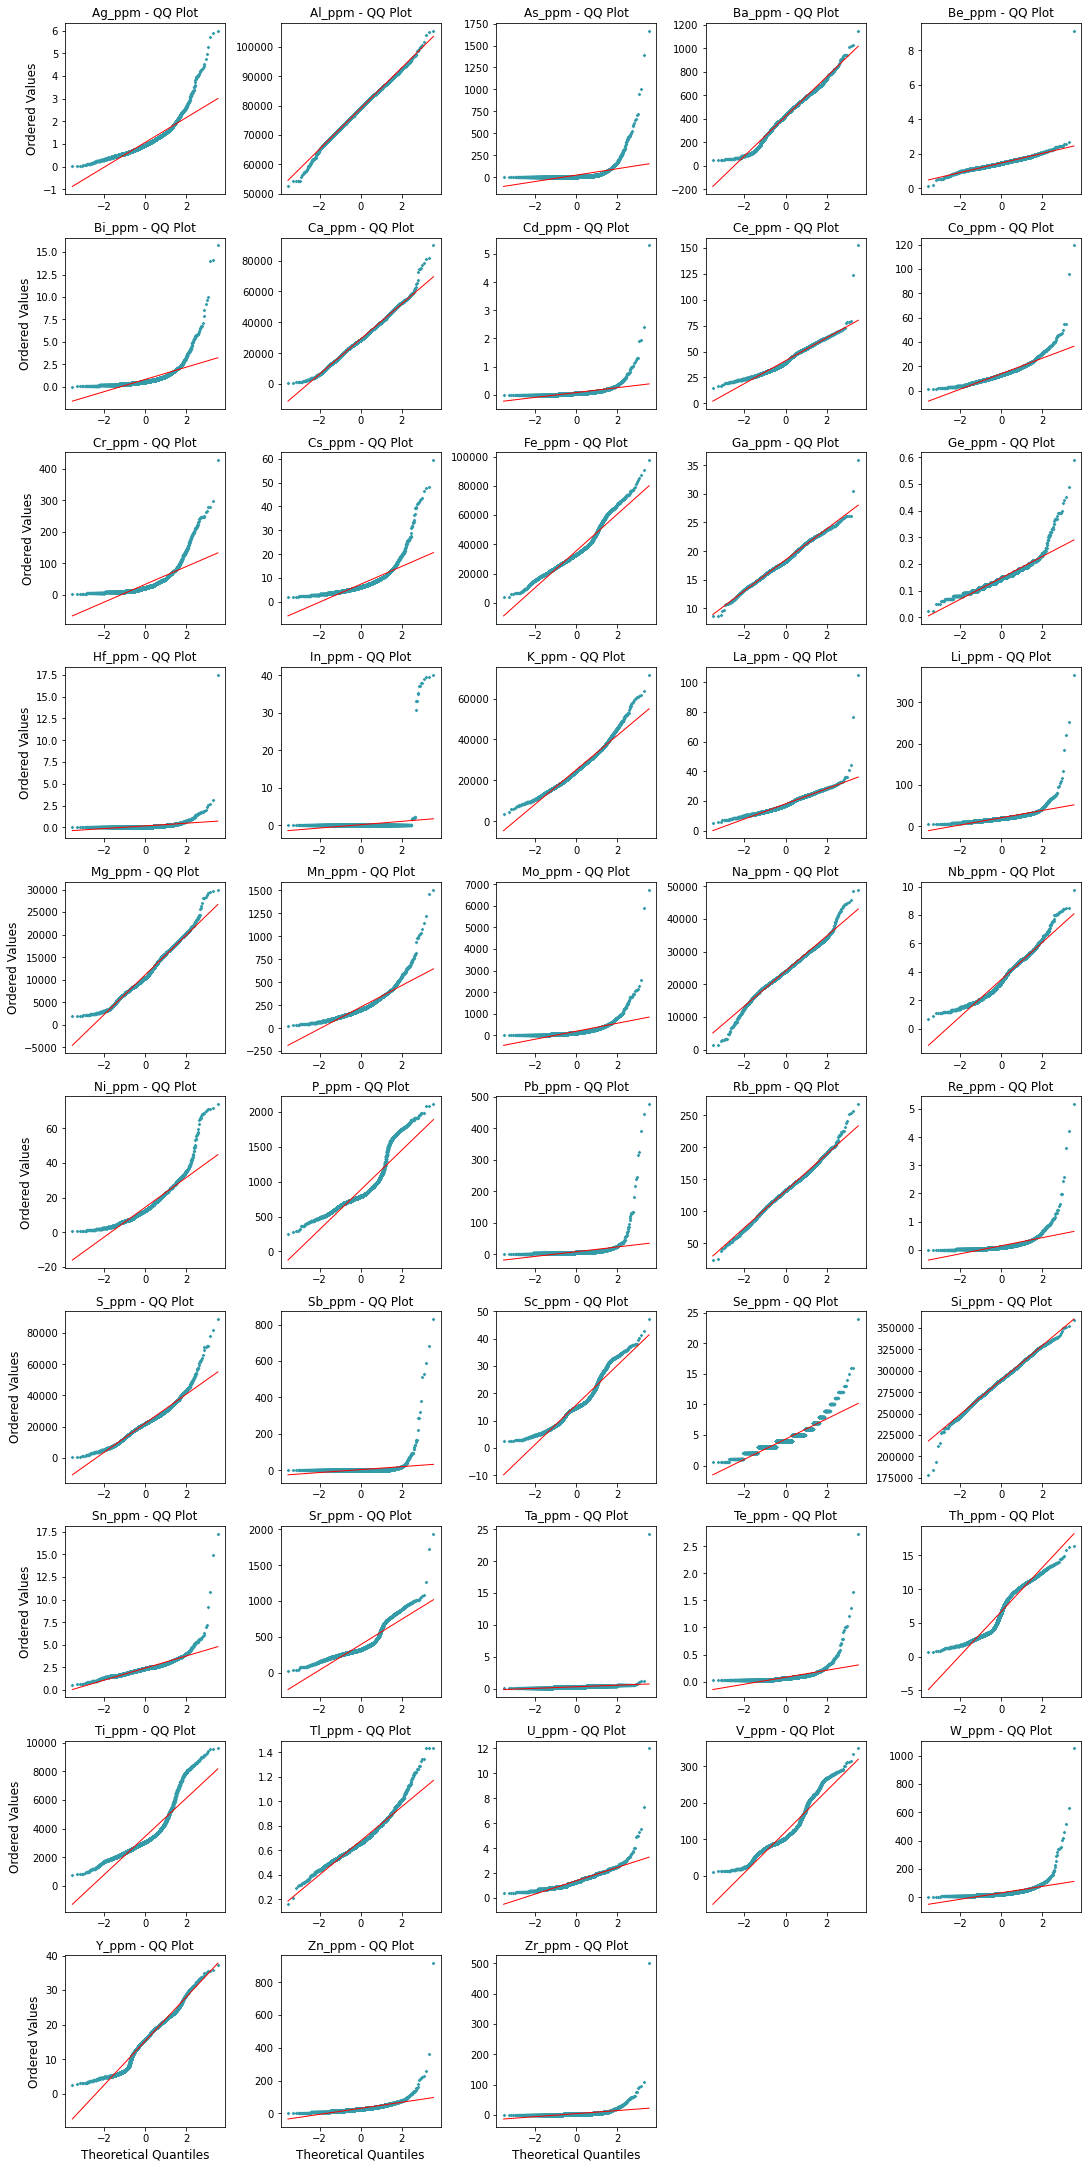

In [ ]:
# import stats module from scipy
from scipy import stats

# set up a 7 by 7 suplot array
fig, axes = plt.subplots(10,5,figsize=(15,30), constrained_layout=True)

for i, ax in enumerate(axes.flatten()):
  if i < len(ppm_cols):
    (osm, osr), (m, c, r) = stats.probplot(df[ppm_cols[i]].dropna(), dist='norm')
    ax.plot(osm, m*osm + c, c='r')         # normal distribution line
    ax.scatter(osm, osr, s=3, c='#339CA8') # qqplot points
    ax.set_title(ppm_cols[i] + ' - QQ Plot')
  else:
    ax.axis('off')

for i in range(10):
  axes[i,0].set_ylabel('Ordered Values')
for i in range(5):
  axes[9,i].set_xlabel('Theoretical Quantiles')

plt.show()

Cd, Ge, Hf, In, Se, and Ta have pretty low precision.

## Variance Matrix

Calculate and plot a variance matrix ($\tau$). This is preferred over a Pearson correlation matrix given the compositional nature of the data.

Low $\tau$ values suggest a degree of proportionality between the element pairs. See [Dimitrijeva et al., 2019](https://doi.org/10.1016/j.oregeorev.2018.12.013) for more on this.


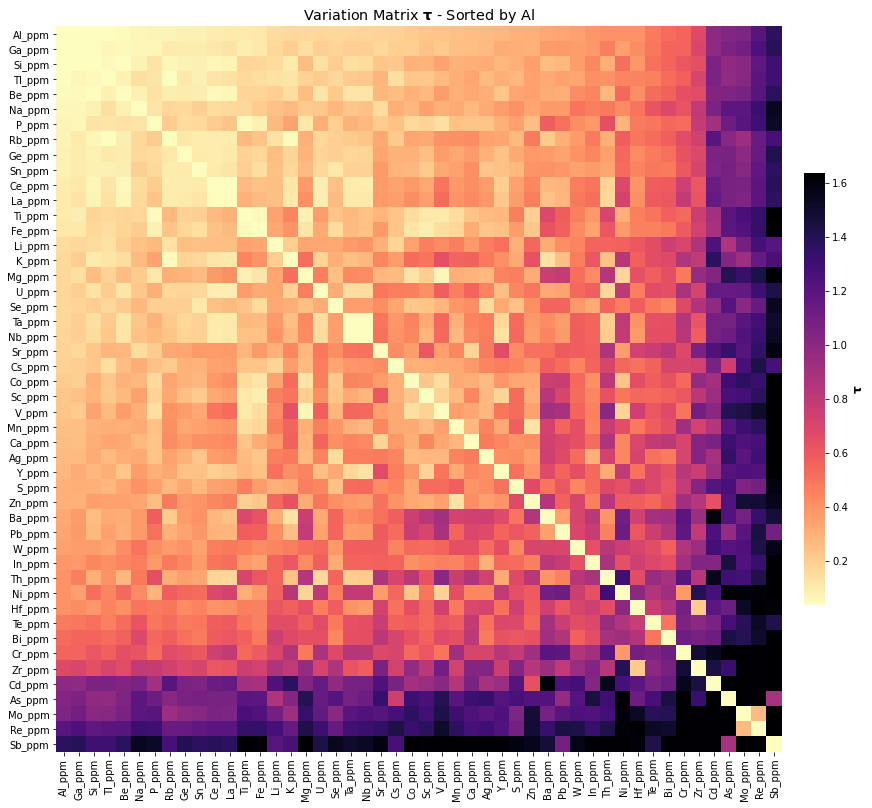

In [ ]:
# import seaborn plotting library
import seaborn as sns
import matplotlib.colors as colors

# define a function to calculate and return a variance matrix
def var_matrix(df, columns):
  var_df = pd.DataFrame(columns=columns, index=columns)
  for i in columns:
    for j in columns:
      tau = np.var(np.log(df[i].values / df[j].values))
      var_df.loc[i, j] = tau
  return var_df.astype('float32')

# get a variance matrix, sort the columns by variance to Al
var_df = var_matrix(df, ppm_cols)
sorted_ppm_cols = var_df.sort_values('Al_ppm', ascending=True).index

# recompute a variance matrix with the sorted columns
var_df = var_matrix(df, sorted_ppm_cols)

# use astropy to normalise the colourmap to 95% of the data
color_norm = simple_norm(var_df.values.flatten(), percent=95)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(12,12), constrained_layout=True)
sns.heatmap(var_df,
            cmap='magma_r', norm=color_norm,
            ax=ax, cbar=True,
            xticklabels=var_df.columns, yticklabels=var_df.index,
            cbar_kws={'shrink':0.5,'label':r'$\mathit{\mathbf{\tau}}$'},)
ax.set_title(r'Variation Matrix $\mathit{\mathbf{\tau}}$ - Sorted by Al', fontsize='x-large')
ax.set_aspect(1)
plt.show()

## Heirarchical Agglomerative Clustering

Run a heirarchical clustering workflow on the variance matrix.

*NOTE: There was a bug in this prior to 24/08/2021 where I had the wrong labels on the dendrogram. Sharp eyed readers would have noticed that common highly correlated element pairs such as Hf-Zr, Nb-Ta and Ce-La didn't plot near each other. This has been rectified. Note the distinct group of Cu-mineralisation related elements (Mo, Sb, As, etc.).

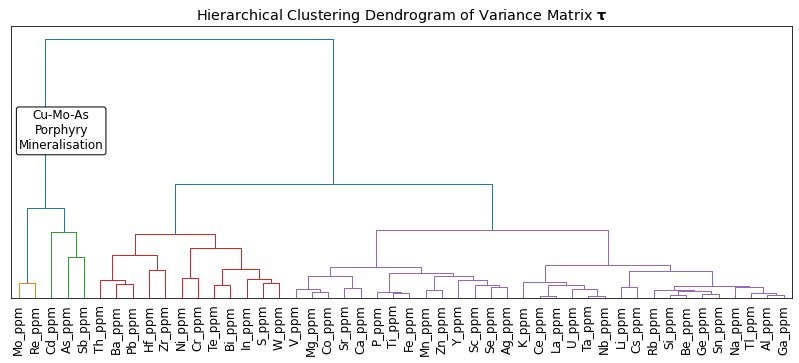

In [ ]:
# get dendrogram and agglomerative clustering modules
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# define a function to plot a dendrogram (from sklearn examples)
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# set model parameters, fit to pearson correlation matrix
model = AgglomerativeClustering(distance_threshold=10, # full tree
                                n_clusters=None, linkage='ward')
model = model.fit(var_df.values)

# create a figure and subplot for the dendrogram
fig, ax = plt.subplots(figsize=(14,5))
ax.set_title(r'Hierarchical Clustering Dendrogram of Variance Matrix $\mathit{\mathbf{\tau}}$', fontsize='x-large')

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode=None, p=10, color_threshold=5)

# convert numerical labels to relevant mineral percentage labels
xlabel_ints = [int(item.get_text()) for item in ax.get_xticklabels()]
xlabels = [var_df.columns[x] for x in xlabel_ints]
ax.set_xticklabels(xlabels, fontdict={'fontsize':12, }, rotation=90)
ax.axes.get_yaxis().set_ticks([]) # remove y axis ticks
ax.annotate('Cu-Mo-As\nPorphyry\nMineralisation', (31,10),
            ha='center', fontsize='large',
            bbox=dict(facecolor='w', edgecolor='k', boxstyle='round,pad=0.2'))
plt.show()

## Non-linear Dimensionality Reduction

Use [UMAP](https://arxiv.org/abs/1802.03426) to extract 3D embeddings to visualise geochemical analyses in 'similarity' space. Rotate these embeddings to maximise variance in each dimension with PCA, then scale to between 0 and 1 for use as an RGB colour value. This embedding-to-RGB method is a great way of visualising similarity space without the need for clustering, see more about it in [Smets et al., 2019](https://pubs.acs.org/doi/10.1021/acs.analchem.8b05827).

A isometric log ratio (ILR) transformation is employed prior to dimensionality reduction as this is necessary to transform the compositional data from simplicial space to euclidean space.

In [ ]:
# import cuML's gpu-accelerated UMAP function and Pyrolite's isometric log ratio
# transform module
from cuml import UMAP as cuUMAP
from pyrolite.util.skl.transform import ILRTransform

# make a list of lithophile elements (copy pasted from wikipedia lol)
lithophiles = 'Al, B, Ba, Be, Br, Ca, Cl, Cr, Cs, F, I, Hf, K, Li, Mg, Na, Nb, O, P, Rb, Sc, Si, Sr, Ta, Th, Ti, U, V, Y, Zr, W'.split(', ')
lithophiles = [x+'_ppm' for x in lithophiles if x+'_ppm' in ppm_cols]

# first run an isometric log ratio transformation
X_ilr = ILRTransform().transform(df[lithophiles].values)

# define a umap transformer, fit it to ILR geochemsitry and get embeddings
UMAP = cuUMAP(n_neighbors=50, n_components=3, min_dist=0.0, random_state=69)
embeds = UMAP.fit_transform(X_ilr)

# rotate a copy of the embeddings with 3-component PCA and scale the resultant
# coordinates between 0 and 1 to paint RGB colours onto them in visualisations
sc_embeds = PCA(n_components=3).fit_transform(embeds)
sc_embeds[:,0] =  (sc_embeds[:,0] - sc_embeds[:,0].min()) / (sc_embeds[:,0].max() - sc_embeds[:,0].min()) # red colours
sc_embeds[:,1] =  (sc_embeds[:,1] - sc_embeds[:,1].min()) / (sc_embeds[:,1].max() - sc_embeds[:,1].min()) # green colours
sc_embeds[:,2] =  (sc_embeds[:,2] - sc_embeds[:,2].min()) / (sc_embeds[:,2].max() - sc_embeds[:,2].min()) # blue colours

Visualise embeddings in interactive 3D plot.

In [ ]:
# import plotly and set the renderer to colab
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib as mpl
pio.renderers.default = 'colab'

# define a function to make a 3D plot
def plotly_3d(x, y, z, colordata, cmap, pointsize):
  if cmap is not None:
    # get colour dictionary for labels, set noise cluster to black
    colormap = plt.cm.get_cmap(cmap, len(np.unique(colordata)))
    colordict = dict(zip(sorted(np.unique(colordata)), colormap.colors.tolist()))
    colordict[-1] = [0, 0, 0, 1]
    # get marker sizes set noise cluster to 1/2 the other markers
    sizes = np.array([pointsize for x in colordata])
    sizes[colordata==-1] = pointsize / 2
    marker = dict(size=sizes, line=dict(width=0), color=[colordict[x] for x in colordata], opacity=0.8)
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker,
                                       hovertext=['clstr_'+str(x) for x in colordata])])
  else:
    marker = dict(size=[pointsize for x in colordata], line=dict(width=0),
                  color=np.array([mpl.colors.to_hex(i) for i in colordata]), opacity=0.8)
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)])
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  fig.show()

# plot the emebdeddings with RBG colours from scaled embedding array
plotly_3d(embeds[:,0], embeds[:,1], embeds[:,2], sc_embeds, None, 5)

What do these look like down hole?

In [ ]:
# plot the samples down hole with RBG colours from scaled embedding array
plotly_3d(df.East.values, df.North.values, df.Elevation.values, sc_embeds, None, 5)

Spatially coherent results!

## Density Clustering

Use HDBSCAN for density clustering of the lithophile embeddings.

In [ ]:
# import hdbscan
from hdbscan import HDBSCAN

# define hdbscan paramters
hdbscan_params = {'min_cluster_size':125,        # minimum points in a cluster
                  'min_samples':5,               # sensitivity to 'noise'
                  'metric':'euclidean'}          # adjacency metric

# get labels
labels = HDBSCAN(**hdbscan_params).fit_predict(embeds)
print ('N unique cluster labels:', len(np.unique(labels[labels!=-1])))

# plot the emebdeddings with RBG colours from scaled embedding array
plotly_3d(embeds[:,0], embeds[:,1], embeds[:,2], labels, 'tab10', 5)

N unique cluster labels: 9


In [ ]:
# plot the samples down hole with RBG colours from scaled embedding array
plotly_3d(df.East.values, df.North.values, df.Elevation.values, labels, 'tab10', 5)

## Scatter Plots

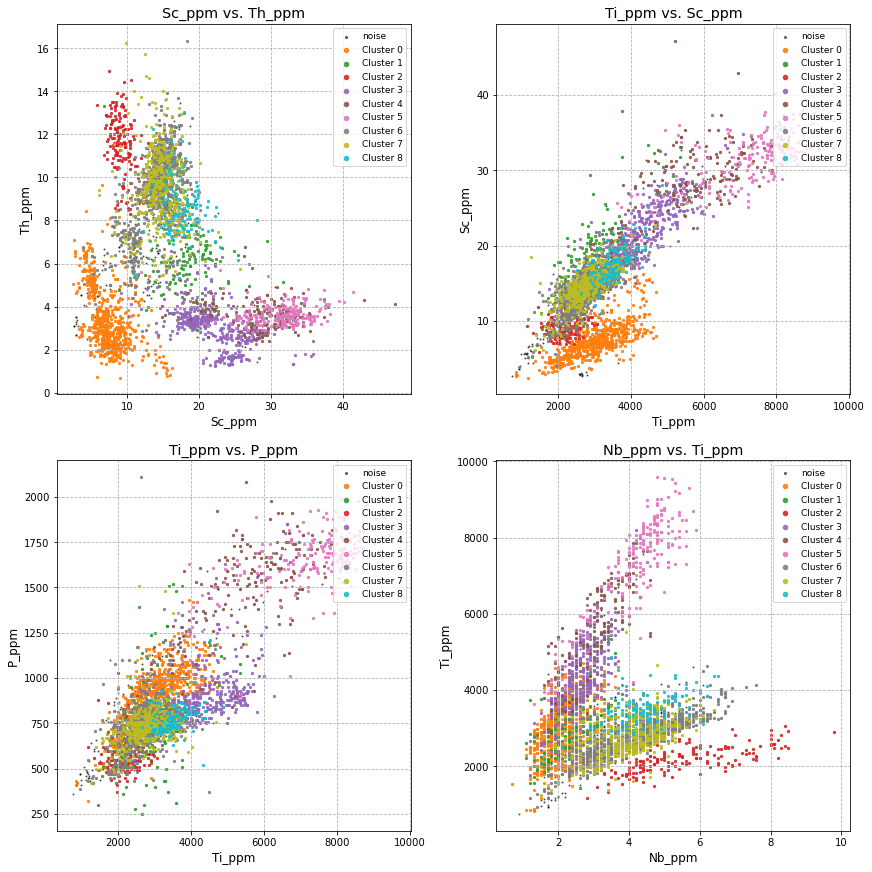

In [ ]:
# define a function to plot scatter plots coloured by cluster labels
def plt_scatter_axis(ax, df, col1, col2, labels, cmap):
  # construct colour dictionary as before
  colormap = plt.cm.get_cmap(cmap, len(np.unique(labels)))
  colordict = dict(zip(sorted(np.unique(labels)), colormap.colors.tolist()))
  colordict[-1] = [0, 0, 0, 1]
  # build a plot
  for i in np.unique(labels):
    if i == -1:
      ax.scatter(df.loc[labels==i, col1], df.loc[labels==i, col2],
                s=5, marker='.', color=colordict[i], label='noise', alpha=0.5)
    else:
      ax.scatter(df.loc[labels==i, col1], df.loc[labels==i, col2],
                s=20, marker='.', color=colordict[i], label='Cluster %s'%(str(i)), alpha=0.9)
  ax.set(xlabel=col1, ylabel=col2)
  ax.set_title(col1 + ' vs. ' + col2, fontsize='x-large')
  ax.grid(linestyle='--')
  ax.legend(loc='upper right', bbox_to_anchor=(1,1), frameon=True,
            markerscale=2, facecolor='w', fontsize=9)
  return ax

# build a list of tuples containing elements to plot
plot_els = [('Sc_ppm','Th_ppm'),('Ti_ppm','Sc_ppm'),
            ('Ti_ppm','P_ppm'),('Nb_ppm','Ti_ppm')]

# build a subplot array for a series of lithophile combinations
fig, axes = plt.subplots(2,2,figsize=(12,12), facecolor='w', constrained_layout=True)
for ax, (col1, col2) in zip(axes.flatten(), plot_els):
  ax = plt_scatter_axis(ax, df, col1, col2, labels, 'tab10')
plt.show()

## UPDATE: Hornblende Fractionation

This section has been updated to attempt to pull out the hornblende fractionation patterns mentioned by Scott's linkedin post. The key here is to extract a set of ratios between various elements that contain the crucial hornblende fractionation signal. My former PhD office mate Tristan Wells gave me some pointers.



In [ ]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# append ratios to the data frame
df['V/Sc_ratio'] = df.V_ppm / df.Sc_ppm
df['Ti/Sc_ratio'] = df.Ti_ppm / df.Sc_ppm
df['Sc/Y_ratio'] = df.Sc_ppm / df.Y_ppm
df['La/Y_ratio'] = df.La_ppm / df.Y_ppm
df['Ti/Y_ratio'] = df.Ti_ppm / df.Y_ppm
df['Sr/Y_ratio'] = df.Sr_ppm / df.Y_ppm
df['Zr/Y_ratio'] = df.Zr_ppm / df.Y_ppm
df['Nb/Ti_ratio'] = df.Nb_ppm / df.Ti_ppm
df['Ti/Si_ratio'] = df.Ti_ppm / df.Si_ppm
df['Ti/Al_ratio'] = df.Ti_ppm / df.Al_ppm

# make a list of ratio columns
ratios = [x for x in df.columns if 'ratio' in x]

# z-score these ratios using standard scaler
X_ratios = StandardScaler().fit_transform(df[ratios].values)

# generate an embedding of these ratios
ratio_UMAP = cuUMAP(n_neighbors=50, n_components=3, min_dist=0.0, random_state=420)
ratio_embeds = ratio_UMAP.fit_transform(X_ratios)

# plot these embeddings coloured by V/Sc ratio! Can't use function for this :(
fig = go.Figure(data=[go.Scatter3d(
    x=ratio_embeds[:,0], y=ratio_embeds[:,1], z=ratio_embeds[:,2],
    mode='markers',
    marker=dict(size=3, color=df['V/Sc_ratio'].values, colorscale='Viridis',
        opacity=0.8, colorbar=dict(title="V/Sc Ratio"),)
      )])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Cluster these embeddings and visualise the cluster labels in embedding space.

In [ ]:
# define hdbscan paramters
hdbscan_params = {'min_cluster_size':125,        # minimum points in a cluster
                  'min_samples':5,               # sensitivity to 'noise'
                  'metric':'euclidean'}          # adjacency metric

# get labels
ratio_labels = HDBSCAN(**hdbscan_params).fit_predict(ratio_embeds)
print ('N unique cluster labels:', len(np.unique(ratio_labels[ratio_labels!=-1])))

# plot the emebdeddings with RBG colours from scaled embedding array
plotly_3d(ratio_embeds[:,0], ratio_embeds[:,1], ratio_embeds[:,2], ratio_labels, 'tab10', 5)

N unique cluster labels: 6


Looks like cluster 1 is the is high V/Sc ratio cluster. Where is this down hole?

In [ ]:
# plot the samples down hole with RBG colours from scaled embedding array
plotly_3d(df.East.values, df.North.values, df.Elevation.values, ratio_labels, 'tab10', 5)

Where are these clusters on the scatter plots?

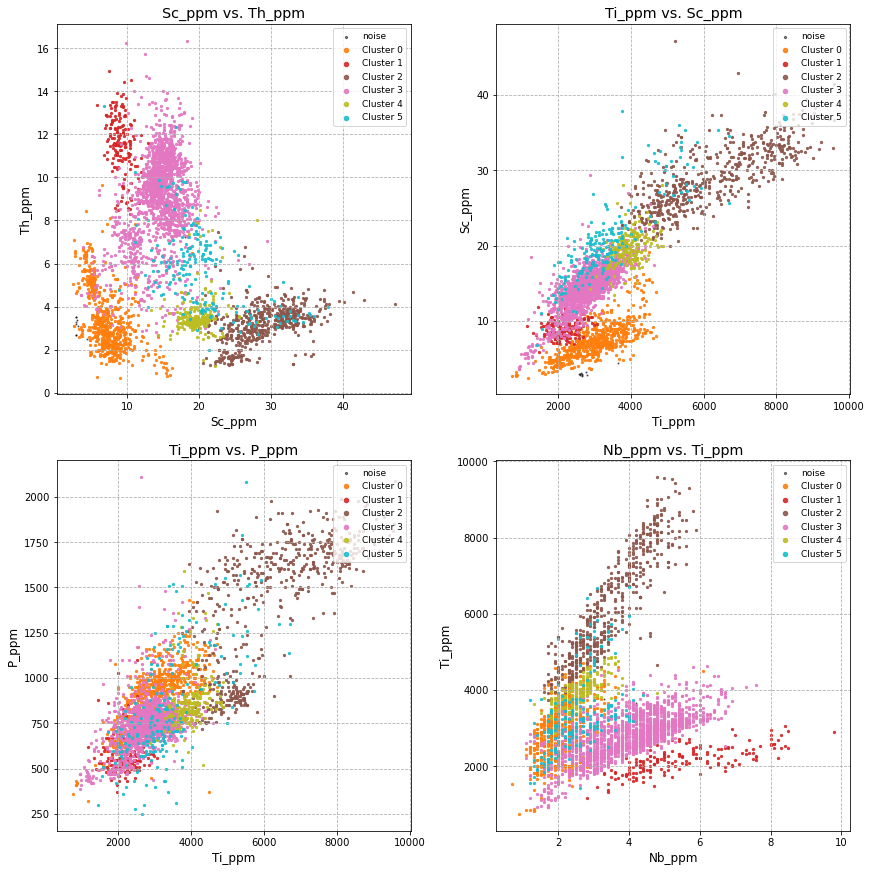

In [ ]:
# build a list of tuples containing elements to plot
plot_els = [('Sc_ppm','Th_ppm'),('Ti_ppm','Sc_ppm'),
            ('Ti_ppm','P_ppm'),('Nb_ppm','Ti_ppm')]

# build a subplot array for a series of lithophile combinations
fig, axes = plt.subplots(2,2,figsize=(12,12), facecolor='w', constrained_layout=True)
for ax, (col1, col2) in zip(axes.flatten(), plot_els):
  ax = plt_scatter_axis(ax, df, col1, col2, ratio_labels, 'tab10')
plt.show()

Plot cluster labels on V/Sc vs Ti/Si and V/Sc vs Ti/Al scatter plots. These are measures of hornblende vs general fractionation.


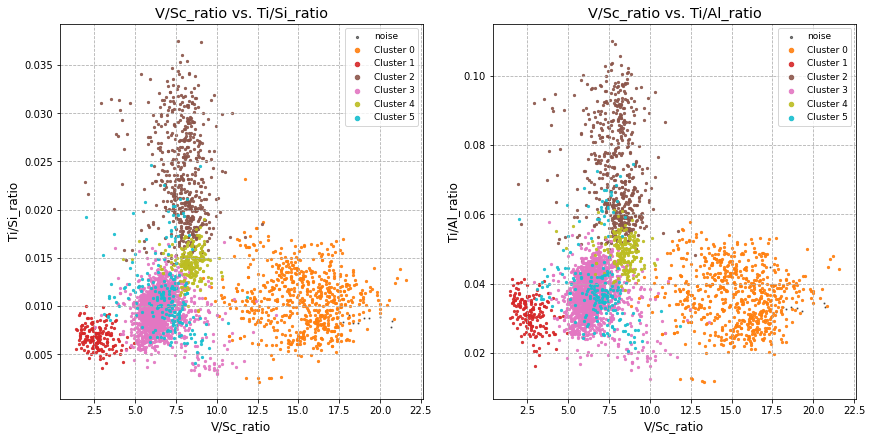

In [ ]:
# build a list of tuples containing elements to plot
plot_els = [('V/Sc_ratio','Ti/Si_ratio'),('V/Sc_ratio','Ti/Al_ratio')]

# build a subplot array for a series of lithophile combinations
fig, axes = plt.subplots(1,2,figsize=(12,6), facecolor='w', constrained_layout=True)
for ax, (col1, col2) in zip(axes.flatten(), plot_els):
  ax = plt_scatter_axis(ax, df, col1, col2, ratio_labels, 'tab10')
plt.show()